In [2]:
# 📌 Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score

# 📌 Step 2: Load Dataset
# For demonstration, let's use a public dataset (Amazon reviews)
# You can replace this with a Flipkart or custom dataset if available

url = "https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv"
df = pd.read_csv(url)

# 📌 Step 3: Check Data
df = df[['label', 'tweet']]
df.columns = ['Sentiment', 'Review']
df['Sentiment'] = df['Sentiment'].map({0: 'Negative', 1: 'Positive'})
df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Sentiment,Review
0,Negative,@user when a father is dysfunctional and is s...
1,Negative,@user @user thanks for #lyft credit i can't us...
2,Negative,bihday your majesty
3,Negative,#model i love u take with u all the time in ...
4,Negative,factsguide: society now #motivation


In [3]:
# 📌 Step 4: Preprocess Text
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return " ".join(words)

df['Clean_Review'] = df['Review'].apply(clean_text)
df.head()

,Sentiment,Review,Clean_Review
0,Negative,@user when a father is dysfunctional and is s...,user father dysfunct selfish drag kid dysfunct...
1,Negative,@user @user thanks for #lyft credit i can't us...,user user thank lyft credit cant use caus dont...
2,Negative,bihday your majesty,bihday majesti
3,Negative,#model i love u take with u all the time in ...,model love u take u time ur
4,Negative,factsguide: society now #motivation,factsguid societi motiv


In [4]:
# 📌 Step 5: Convert Labels
df['Sentiment'] = df['Sentiment'].map({'Positive': 1, 'Negative': 0})

# 📌 Step 6: TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['Clean_Review']).toarray()
y = df['Sentiment']

# 📌 Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 Step 8: Train Naive Bayes Classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# 📌 Step 9: Predictions
y_pred = model.predict(X_test)

Accuracy: 0.9518223056468011
Precision: 0.9302325581395349
Recall: 0.3508771929824561

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      5937
           1       0.93      0.35      0.51       456

    accuracy                           0.95      6393
   macro avg       0.94      0.67      0.74      6393
weighted avg       0.95      0.95      0.94      6393



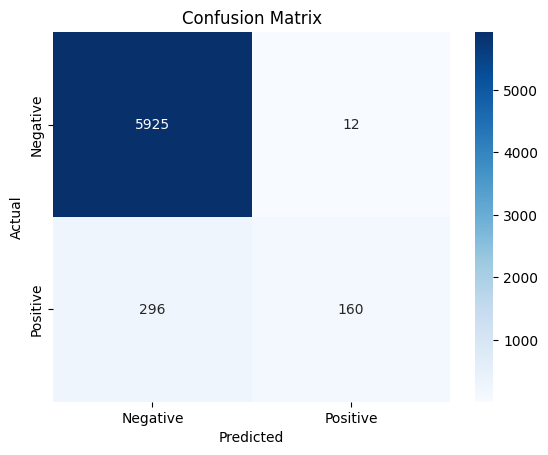

In [5]:
# 📌 Step 10: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 📌 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
